In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from skimage import io
import scipy.misc

### Reading files from the dataset

In [2]:
files = os.listdir('./Dataset-1/')
images = []
flattened_images = []

In [3]:
for f in files:
    img = io.imread("./Dataset-1/" + f, as_gray=True)
    images.append(img)
    flattened_images.append(img.flatten())

In [4]:
A_transpose = np.array(flattened_images)
A = A_transpose.T
m = np.mean(A, axis=1)

### Mean Image

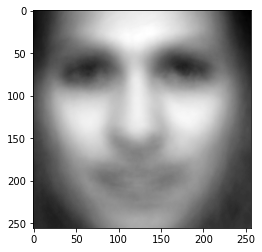

In [5]:
im = m.reshape(256,256)
imgplot = plt.imshow(im, cmap='gray')
plt.show()

In [6]:
Zero_mean_matrix = np.ones((65536,520))
column = 0

for values in flattened_images:
    zm = A[:,column] - m
    zm = np.squeeze(zm)
    Zero_mean_matrix[:,column] = zm
    column = column + 1

In [7]:
d = (np.dot(np.transpose(Zero_mean_matrix),Zero_mean_matrix))/256
u_list =[]
w2, v2 = np.linalg.eigh(d)

for ev in v2:
    ev_transpose = np.transpose(np.matrix(ev))
    u = np.dot(Zero_mean_matrix,ev_transpose)                          
    u = u / np.linalg.norm(u)
    u_i= u.reshape(256,256)
    u_list.append(u_i)

### Example of Eigenfaces

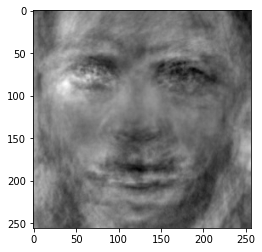

In [8]:
imgplot = plt.imshow(np.array(u_list)[0], cmap='gray')
plt.show()

In [9]:
def Reconstruct(k):
    dict ={}
    rec_face=[]
    weights = np.zeros((520,k))
    matrixU = np.zeros((65536,k))
    c =0
    
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c + 1
        
    for face_num in range(0,520):
        w = np.dot(matrixU.T ,Zero_mean_matrix[:,face_num])
        weights[face_num,:] = w

        face = np.dot(w, matrixU.T)
        
        minf = np.min(face)
        maxf = np.max(face)
        face = face-float(minf)
        face = face/float((maxf-minf))
        
        face = face + m.T
        reshape_face = face.reshape(256,256)
        rec_face.append(reshape_face)
        
    dict[k] = weights
    
    return rec_face, weights


rec_face, we = Reconstruct(200)

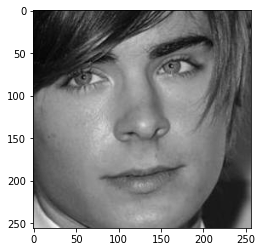

In [10]:
imgplot = plt.imshow(images[100], cmap='gray')
plt.show()

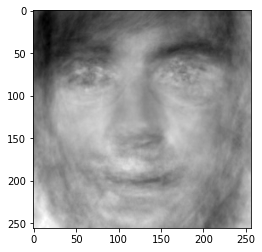

In [11]:
imgplot = plt.imshow(rec_face[100], cmap='gray')
plt.show()

You can check if the ratio of the eigenvalues corresponding to the chosen eigenvectors divided by the sum of all eigenvalues is greater than 0.8.

In [12]:
sum1 = 0
for i in range(0, 520):
    sum1 += w2[i]
    
arr = []
for i in range(1, 520):
    s = 0
    for j in range(520-i+1, 520):
        s += w2[j]
    r = s/sum1
    arr.append(r)

c = 1
for i in arr:
    if i >= 0.8:
        N = c
        print(c)
        break
    c = c+1

32


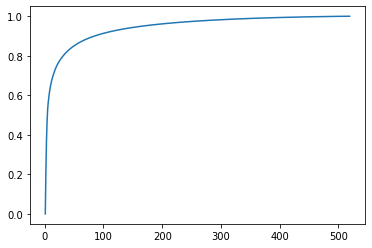

In [13]:
x = [i for i in range(1,520)]

plt.plot(x,arr)

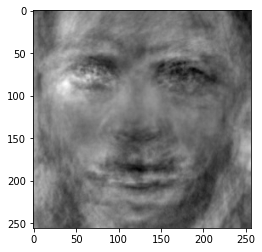

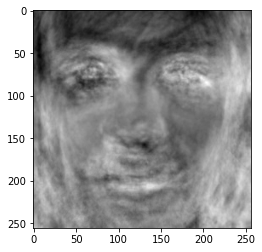

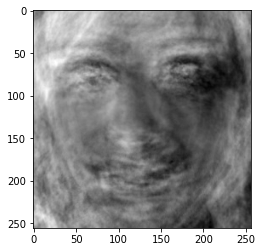

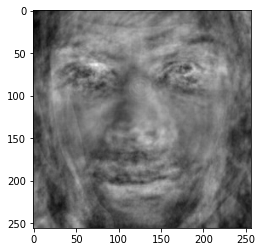

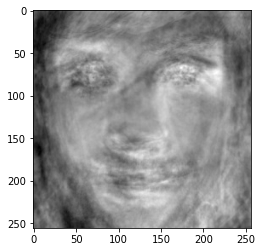

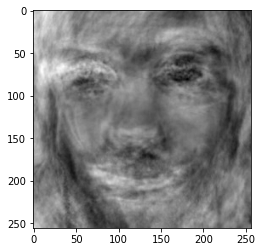

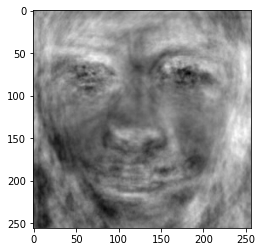

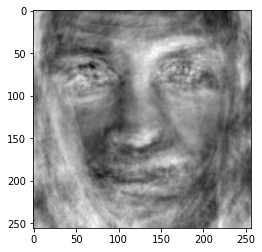

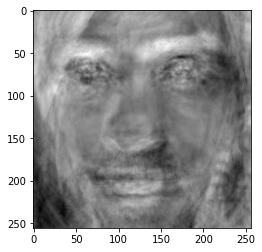

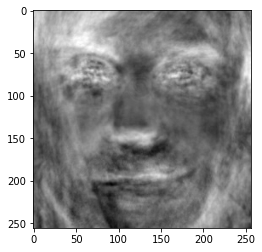

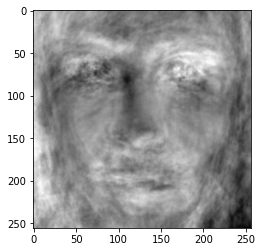

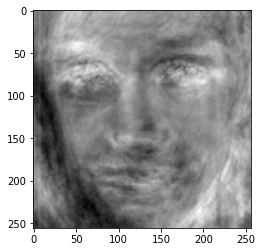

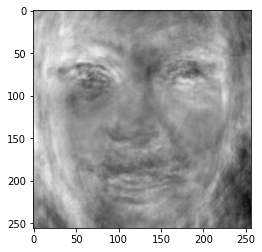

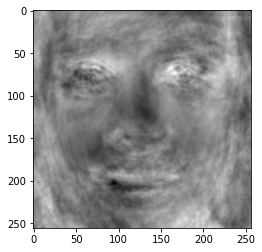

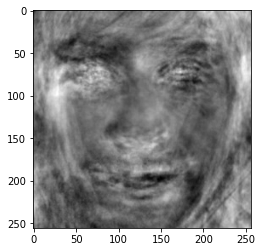

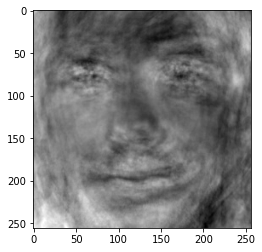

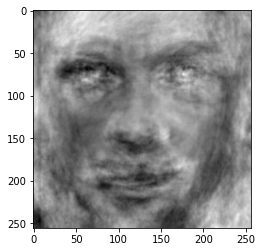

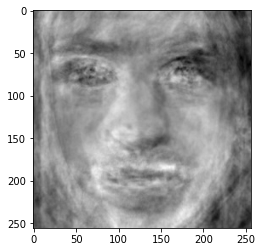

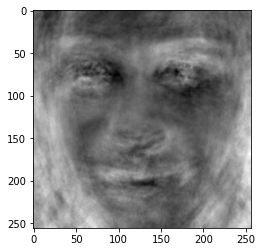

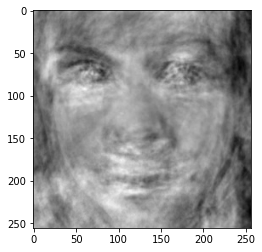

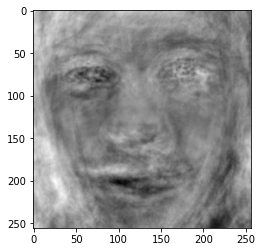

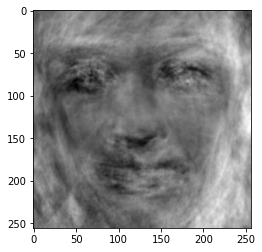

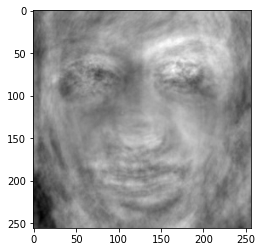

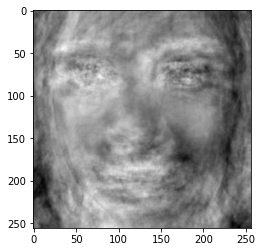

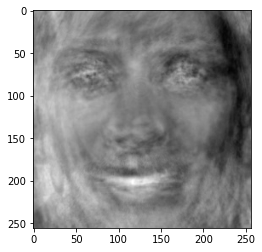

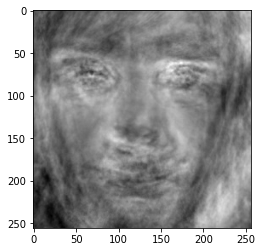

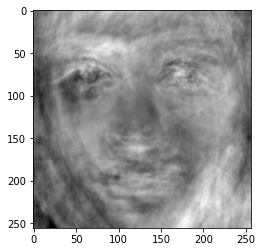

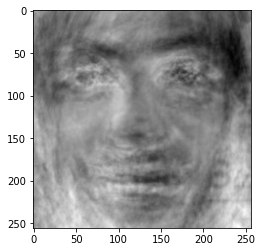

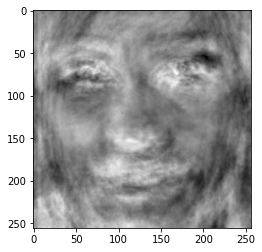

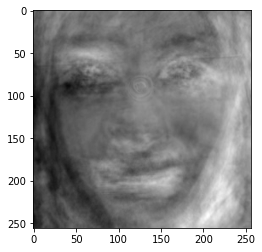

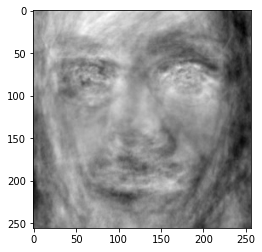

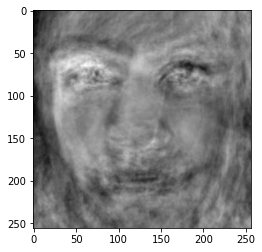

In [14]:
for i in range(0,N):
    imgplot = plt.imshow(np.array(u_list)[i], cmap='gray')
    plt.show()

In [15]:
req_face, w2 = Reconstruct(32)

In [16]:
x = np.array(w2)
y = np.zeros([1, np.array(req_face).shape[0]])

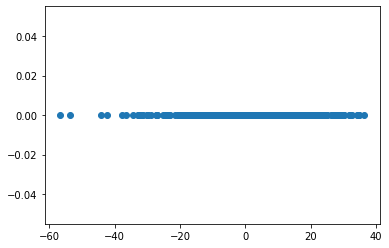

In [17]:
plt.scatter(x[:,1],y)

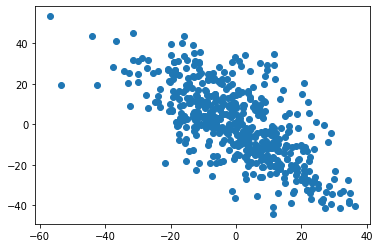

In [18]:
plt.scatter(x[:,1],x[:,2])

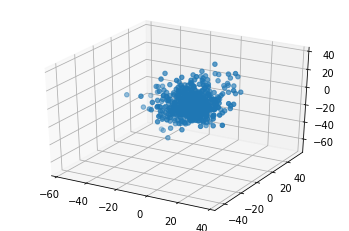

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,1],x[:,2],x[:,3])